In [69]:
from functools import reduce

import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import qutip as qt
from qutip.qip.algorithms.qft import qft

In [15]:
q = qft(2).full()
q_dag = qft(2).inv().full()

p2 = np.diag(np.square([0, np.pi/2, np.pi, -np.pi/2]))

https://arxiv.org/pdf/1202.1536.pdf

In [53]:
K = q @ p2 @ q_dag
V = np.diag([10, -10, 10, -10])

In [82]:
def total_coeff_diff(eH, eH_Trot):
    a = np.ndarray.flatten(np.abs(eH * qt.basis(4, 1)))
    b = np.ndarray.flatten(np.abs(eH_Trot * qt.basis(4, 1)))
    return sum(abs(a - b))

([<matplotlib.axis.XTick at 0x128bdeca0>,
 [Text(0, 0, '0'), Text(0, 0, '1'), Text(0, 0, '2'), Text(0, 0, '3')])

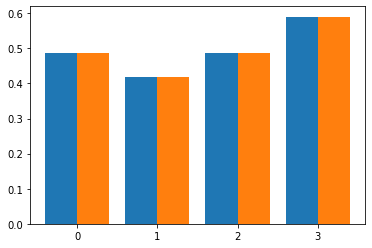

In [80]:
dt = 1/10
eH = sc.linalg.expm(-1j * K)
eH_Trot_1 = sc.linalg.expm(-1j * dt * K)
eH_Trot = reduce(np.matmul, [eH_Trot_1] * 10)

plt.bar([x - 0.2 for x in range(4)], np.ndarray.flatten(np.abs(eH * qt.basis(4, 1))), width=0.4)
plt.bar([x + 0.2 for x in range(4)], np.ndarray.flatten(np.abs(eH_Trot * qt.basis(4, 1))), width=0.4)
plt.xticks(range(4), range(4))

([<matplotlib.axis.XTick at 0x128fa1c70>,
 [Text(0, 0, '0'), Text(0, 0, '1'), Text(0, 0, '2'), Text(0, 0, '3')])

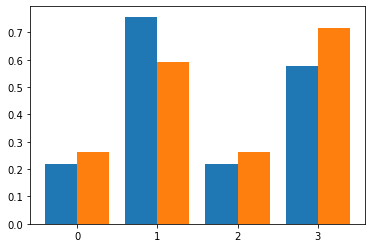

In [84]:
dt = 1/10
eH = sc.linalg.expm(-1j * (K + V))
eH_Trot_1 = sc.linalg.expm(-1j * dt * V) @ sc.linalg.expm(-1j * dt * K)
eH_Trot = reduce(np.matmul, [eH_Trot_1] * 10)

plt.bar([x - 0.2 for x in range(4)], np.ndarray.flatten(np.abs(eH * qt.basis(4, 1))), width=0.4)
plt.bar([x + 0.2 for x in range(4)], np.ndarray.flatten(np.abs(eH_Trot * qt.basis(4, 1))), width=0.4)
plt.xticks(range(4), range(4))

Text(0.5, 0, 'Num Trotterization Steps')

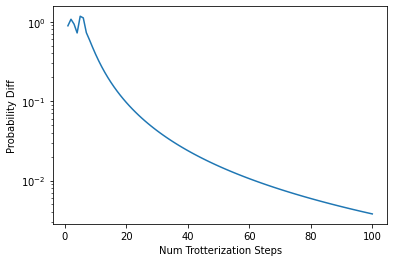

In [100]:
diffs = []
num_steps = range(100, 0, -1)
for steps in num_steps:
    dt = 1/steps
    eH = sc.linalg.expm(-1j * (K + V))
    eH_Trot_1 = sc.linalg.expm(-1j * dt * V) @ sc.linalg.expm(-1j * dt * K)
    eH_Trot = reduce(np.matmul, [eH_Trot_1] * steps)
    diffs.append(total_coeff_diff(eH, eH_Trot))
plt.plot(num_steps, diffs)
plt.yscale("log")
plt.ylabel("Probability Diff")
plt.xlabel("Num Trotterization Steps")